In [ ]:
'''recap lezione precedente
recap modi per definire un array:
    np.erray([])
    np.arange
    np.linspace
    np.longspace
    np.ones
    np.zeros

recap attributi di un array:
    .ndim
    .nspace
    len()

recap indicizzazione e slicing:
    tutto uguale alle liste escluso il fatto che se l'arrey è multidimensionale servono più indici

recap metodi di riduzione di un array:
    np.mean 
    std
    np.min/max

axis
np.concatenate
.reshape'''

In [1]:
import numpy as np

In [2]:
#oggi parliamo di operazioni con i vettori

In [ ]:
#SOMMA CON SCALARE
#se sommo uno scalare a un vettore, quello scalare viene sommato a tutti gli elementi del vettore
x=np.array([1, 2, 3])
x+7
#BISOGNA EVITARE DI FARE LA STESSA COSA USANDO UN CICLO FRO I IN RANGE (LEN(X)) X[I]+=7, DIVENTA UN ERRORE GRAVE

array([ 8,  9, 10])

In [ ]:
#SOMMA TRA VETTORI DI MEDESIMA SHAPE
x=np.array([1, 2, 3])
y=np.array([2, 3, 4])
x+y

array([3, 5, 7])

In [ ]:
#con numpy le operazioni tra vettori non sono le operazioni matriciali corrispondenti, ma vengono eseguite elemento per elemento

In [ ]:
#OPERAZIONI CON VETTORI CON DIVERSA SHAPE

In [9]:
#REGOLE DI BROADCASTING
A=np.array([[1,2], [3,4]]) #shape (2,2)
b=np.array([7, -1]) #shape (2)
#agiunge 1 al vettore più piccolo
#si confrontano poi dimensione con dimensione, se una delle due dimensioni è 1 non dà errore, altrimenti si
A+b

array([[ 8,  1],
       [10,  3]])

In [11]:
A=np.array([[1,2], [3,4]])
b=np.array([7,9]).reshape((-1,1))#shape (2,1)
#in questo caso i primi indici sono uguali, quindi non danno problemi, i secondi indici sono diversi ma uno dei due è uno quindi va bene
#copio dunque la colonna che compone b e la aggiungo a destra, poi eseguo la somma termine a termine
A+b

array([[ 8,  9],
       [12, 13]])

In [16]:
#voglio centrare gli elementi nel centro c
n=1000
x=np.random.uniform(size=(1000,3))
c=np.mean(x, axis=0)
for i in range (x.shape[0]): #questo è il modo sbagliato di farlo
    x[i, 0]=x[i, 0]-c[0]
    x[i, 1]=x[i, 1]-c[1]
    x[i, 2]=x[i, 2]-c[2]
x-c 

array([[-0.71926342, -0.71534167, -0.98560075],
       [-0.59887393, -0.57469156, -0.36087698],
       [-0.93238615, -0.63004005, -0.35067219],
       ...,
       [-0.62468901, -0.71584926, -0.83396508],
       [-0.213654  , -0.52766871, -0.12344318],
       [-0.6633513 , -0.27146222, -0.71066419]])

In [17]:
def centra1(x, c):
    for i in range (x.shape[0]): #questo è il modo sbagliato di farlo
        for j in range (3):
            x[i,j]=x[i,j]-c[j]
#ci mette troppo tempo
#devi cambiare la forma di ci in un vettore colonna e poi sottrarlo a x

In [18]:
#funzione che calcola la distanza di un ounto dal centro:
def distanza1 (x, c):#metodi lunghi e lenti
    d=np.zeros(x.shapes[0])#oppure:
    for i in range (x.shape[0]):
        d[i]=np.sqrt(np.sum(np.power(x[i,:]-c, 2.0)))
        dx=x[i,0]-c[0]
        dy=x[i,1]-c[1]
        dz=x[i,2]-c[2]
        d[i]=(dx*2.0 + dy*2.0 + dz*2.0)**0.5


In [19]:
def distanza2(x, c):#metodo veloce e giusto
     np.sum((x-c)**2.0, axis=1)**0.5

In [26]:
%timeit distanza2(x, c)

14.3 μs ± 85 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
#scrivere un programma che dato x, c e una distanza massima, dist_max, calcola il mumero di punti più vicini della distanza minima:
def numero_coordinazione(x, c, dist_max):#modo lungo e sbagliato:
    distanze=distanza2(x, c)
    n_vicini=0
    for distanza in distanze:
        if distanza<dist_max:
            n_vicini+=1
    return n_vicini


In [24]:
a=np.array([1, 2, 3])
a<2

array([ True, False, False])

In [23]:
np.sum(np.array([True, True, False, False]))#sto sommando booleani che saranno 1 solo se sono punti vicini

2

In [27]:
#versione efficiente:
def numero_coordinazione(x, c, dist_max):#modo lungo e sbagliato:
    distanze=distanza2(x, c)
    n_vicini=np.sum(distanze<dist_max)
    return n_vicini

In [ ]:
#scrivere un programma che dato x e c calcola il mumero di punti in x in cui tutte le coordinate sono superiori alle rispettive coordinate:
def numero_punti_quadrante(x, c):#soluzione lenta e sbagliata:
    n_punti=0
    for i in range (x.shape[0]):
        if x[i,0] > c[0] and x[i,1] > x[1] and x[i,2] >c[2]:
            n_punti+=1


In [ ]:
#versione efficiente:
def numero_punti_quadrante(x, c):
    n_punti=np.sum(np.all(x>c, axis=1))
    return n_punti

In [ ]:
#scrivere un progrmma che dato una matrice di punti x, un vettore di cariche elettriche q e un punto c, calcola il potenziale elettrostatico
#dovuto alle cariche puntforme in c
def potenziale (x, q, c):#versione lenta e sbagliata
    pot=0
    for i in range (x.shape[0]):
        dx=x[i, 0] - c[0]
        dy=x[i, 1] - c[1]
        dz=x[i,2] -c[2]
        dist=(dx**2.0 + )

In [ ]:
#versione giusta:
def potenziale (x, q, c):
    d=distanza(x, c)
    pot=np.sum(q/d)
    #rivediti sta parte dalle registrazioni

In [ ]:
#scrivere una funzione che calcola il baricentro (credo):
def baricentro (x, m): #versione lenta con i cicli:
    xc=0
    yc=0
    zc=0
    for i in range (x.shape[0]):
        xc+= x[i,0]*m[i]
        yc+=x[i,1]*m[i]
        zc+=x[i,2]*m[i]
    xc/=np.sum(m)
    yc/=np.sum(m)
    zc/=np.sum(m)
    return np.array([xc, yc, zc])

In [ ]:
#versione giusta:
def baricentro (x, m):
    return np.sum((x*m.reshape((-1, 1))), axis=0) /np.sum(m)

In [ ]:
#scrivere un programma che preso in ingresso un vettore monodimensionale di posizioni campionate con un periodo cosstante
#restituisca una stima della derivata rispetto al tempo:
n=100
p=np.random.uniform(size=n) #versione lenta con i cicli
def derivata (p):
    v=np.zeros(len(p)-1)
    for i in range (len(v)):
        v[i]=(p[i+1]-p[i])
    return v

In [ ]:
#versione corretta:
def derivata (p):
    
    return p[1:]-p[:-1]

In [ ]:
import matplotlib.pyplot as plt
f=plt.figure()
x=np.linspace(-np.pi, np.pi, 1000)
y=np.sin(x)
dy=derivata(y)
#continua guardati la lezione

In [ ]:
#devo creare una matrice di tutto zeri ma con i numeri da 1 a 20 come contorno della matrice:
n=6
a=np.zeros((n,n)) 
a[0,:]=np.arange(1, n+1)
a[1:, -1]=np.arange(n+1, n*2)
a[-1,:-1]=np.arange(n*3-2, n*2-1, -1)
a[-2:0:-1, 0]=np.arange(n*3-1, n*4-3)

In [ ]:
#scrivere una funzione che prende in ingreso una matrice di n punti in  uno spazio bidimensionale organizzati per righe 
#(la prima riga corrisponde alle coordinate x,y,z del primo punto, e così via) e restituisce un vettore di N elementi il cui elemento i-esimo 
#coincide con la distanza del punto i dall'origine calcolata secondo la metrica manhattan. 
#la mettrica manhattan 

def manhattan(x):
#finisci a casa

In [ ]:
#grafici

In [34]:
import matplotlib.pyplot as plt


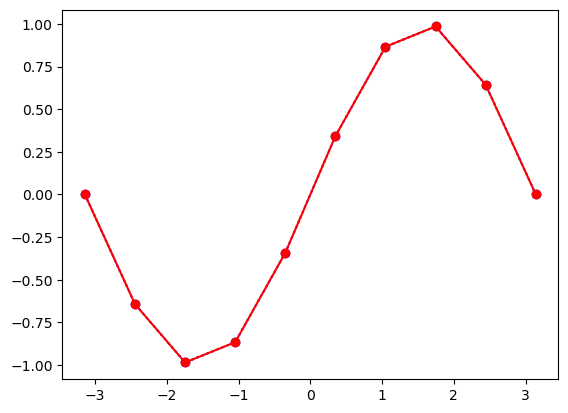

In [40]:
x=np.linspace(-np.pi, np.pi, 10)
y=np.sin(x)
f=plt.figure()
ax=f.add_subplot(1,1,1)
ax.plot (x,y, 'bo:')
ax.plot (x,y, 'ro-')
